In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
import re
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from prettytable import PrettyTable
from pandas import json_normalize



In [2]:
pip install jinja2

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('processed_data.csv')

# def make_pretty(styler):
#     styler.set_caption("******")
#     styler.format(*column*)
#     styler.format_index(lambda v: v.strftime("%A"))
#     styler.background_gradient(axis=None, vmin=1, vmax=5, cmap="YlGnBu")
#     return styler

print(f"Shape of The Phones Dataset: {df.shape}")
print(f"\nHead of The Dataset:")
df.head().style.set_properties(**{"background-color": "#369CB6","color":"white","border": "1.5px  solid black"})

Shape of The Phones Dataset: (1715, 31)

Head of The Dataset:


,phone_brand,phone_model,store,price,currency,price_USD,storage,ram,Launch,Dimensions,Weight,Display_Type,Display_Size,Display_Resolution,OS,NFC,USB,BATTERY,Features_Sensors,Colors,Video,Chipset,CPU,GPU,Year,Foldable,PPI_Density,quantile_10,quantile_50,quantile_90,price_range
0,apple,Apple iPhone 16 Pro,Amazon DE,1256.990000,EUR,1362.070000,256,8,2024-09-20,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),199.000000,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolby Vision, 1000 nits (typ), 2000 nits (HBM)",6.300000,1206 x 2622,iOS 18,1,"USB Type-C 3.2 Gen 2, DisplayPort",3582,"Face ID, accelerometer, gyro, proximity, compass, barometer","Black Titanium, White Titanium, Natural Titanium, Desert Titanium","4K@24/25/30/60/100/120fps, 1080p@25/30/60/120/240fps, 10-bit HDR, Dolby Vision HDR (up to 60fps), ProRes, 3D (spatial) video/audio, stereo sound rec.",Apple A18 Pro (3 nm),Hexa-core (2x4.05 GHz + 4x2.42 GHz),Apple GPU (6-core graphics),2024,0,460,161.756000,552.385000,1380.286000,medium price
1,apple,Apple iPhone 16 Pro,Amazon DE,1381.990000,EUR,1497.520000,512,8,2024-09-20,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),199.000000,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolby Vision, 1000 nits (typ), 2000 nits (HBM)",6.300000,1206 x 2622,iOS 18,1,"USB Type-C 3.2 Gen 2, DisplayPort",3582,"Face ID, accelerometer, gyro, proximity, compass, barometer","Black Titanium, White Titanium, Natural Titanium, Desert Titanium","4K@24/25/30/60/100/120fps, 1080p@25/30/60/120/240fps, 10-bit HDR, Dolby Vision HDR (up to 60fps), ProRes, 3D (spatial) video/audio, stereo sound rec.",Apple A18 Pro (3 nm),Hexa-core (2x4.05 GHz + 4x2.42 GHz),Apple GPU (6-core graphics),2024,0,460,161.756000,552.385000,1380.286000,high price
2,apple,Apple iPhone 16 Pro,Amazon DE,1579.000000,EUR,1711.000000,1000,8,2024-09-20,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),199.000000,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolby Vision, 1000 nits (typ), 2000 nits (HBM)",6.300000,1206 x 2622,iOS 18,1,"USB Type-C 3.2 Gen 2, DisplayPort",3582,"Face ID, accelerometer, gyro, proximity, compass, barometer","Black Titanium, White Titanium, Natural Titanium, Desert Titanium","4K@24/25/30/60/100/120fps, 1080p@25/30/60/120/240fps, 10-bit HDR, Dolby Vision HDR (up to 60fps), ProRes, 3D (spatial) video/audio, stereo sound rec.",Apple A18 Pro (3 nm),Hexa-core (2x4.05 GHz + 4x2.42 GHz),Apple GPU (6-core graphics),2024,0,460,161.756000,552.385000,1380.286000,high price
3,apple,Apple iPhone 16 Pro Max,Amazon DE,1449.000000,EUR,1570.140000,512,8,2024-09-20,163 x 77.6 x 8.3 mm (6.42 x 3.06 x 0.33 in),227.000000,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolby Vision, 1000 nits (typ), 2000 nits (HBM)",6.900000,1320 x 2868,iOS 18,1,"USB Type-C 3.2 Gen 2, DisplayPort",4685,"Face ID, accelerometer, gyro, proximity, compass, barometer","Black Titanium, White Titanium, Natural Titanium, Desert Titanium","4K@24/25/30/60/100/120fps, 1080p@25/30/60/120/240fps, 10-bit HDR, Dolby Vision HDR (up to 60fps), ProRes, 3D (spatial) video/audio, stereo sound rec.",Apple A18 Pro (3 nm),Hexa-core (2x4.05 GHz + 4x2.42 GHz),Apple GPU (6-core graphics),2024,0,460,161.756000,552.385000,1380.286000,high price
4,apple,Apple iPhone 16,Amazon DE,949.000000,EUR,1028.340000,256,8,2024-09-20,147.6 x 71.6 x 7.8 mm (5.81 x 2.82 x 0.31 in),170.000000,"Super Retina XDR OLED, HDR10, Dolby Vision, 1000 nits (typ), 2000 nits (HBM)",6.100000,1179 x 2556,iOS 18,1,"USB Type-C 2.0, DisplayPort",3561,"Face ID, accelerometer, gyro, proximity, compass, barometer","Black, White, Pink, Teal, Ultramarine","4K@24/25/30/60fps, 1080p@25/30/60/120/240fps, HDR, Dolby Vision HDR (up to 60fps), stereo sound rec.",Apple A18 (3 nm),Hexa-core (2x4.04 GHz + 4x2.20 GHz),Apple GPU (5-core graphics),2024,0,460,161.756000,552.385000,1380.286000,medium price


In [4]:
print(f"Informations About Dataset :\n")
print(df.info())

Informations About Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   phone_brand         1715 non-null   object 
 1   phone_model         1715 non-null   object 
 2   store               1715 non-null   object 
 3   price               1715 non-null   float64
 4   currency            1715 non-null   object 
 5   price_USD           1715 non-null   float64
 6   storage             1715 non-null   int64  
 7   ram                 1715 non-null   int64  
 8   Launch              1715 non-null   object 
 9   Dimensions          1715 non-null   object 
 10  Weight              1712 non-null   float64
 11  Display_Type        1715 non-null   object 
 12  Display_Size        1715 non-null   float64
 13  Display_Resolution  1715 non-null   object 
 14  OS                  1715 non-null   object 
 15  NFC                 1715 

In [5]:
print(f"Description of Dataset :\n")
df.describe().T.style.set_properties(**{"background-color": "#369CB6","color":"white","border": "1.5px  solid black"})

Description of Dataset :



,count,mean,std,min,25%,50%,75%,max
price,1715.000000,381.338560,334.142684,49.000000,149.740000,249.990000,499.475000,2179.460000
price_USD,1715.000000,420.052589,361.986094,52.630000,167.890000,279.000000,551.145000,2361.660000
storage,1715.000000,271.286297,207.263335,32.000000,128.000000,256.000000,256.000000,1000.000000
ram,1715.000000,7.973178,3.422996,2.000000,6.000000,8.000000,12.000000,24.000000
Weight,1712.000000,195.212266,24.714075,135.000000,183.500000,193.250000,204.000000,627.000000
Display_Size,1715.000000,6.565038,0.382489,4.700000,6.500000,6.600000,6.700000,12.400000
NFC,1715.000000,0.917201,0.275658,0.000000,1.000000,1.000000,1.000000,1.000000
BATTERY,1715.000000,4657.909038,693.623964,1821.000000,4500.000000,5000.000000,5000.000000,10200.000000
Year,1715.000000,2022.050146,1.427699,2017.000000,2021.000000,2022.000000,2023.000000,2024.000000
Foldable,1715.000000,0.048397,0.214665,0.000000,0.000000,0.000000,0.000000,1.000000


In [6]:
df.describe(include=object).T.style.set_properties(**{"background-color": "#369CB6","color":"white","border": "1.5px  solid black"})

,count,unique,top,freq
phone_brand,1715,22,samsung,432
phone_model,1715,472,Apple iPhone 15 Pro,12
store,1715,8,Amazon DE,585
currency,1715,3,USD,642
Launch,1715,337,2023-09-22,36
Dimensions,1715,397,164.2 x 76.1 x 8.1 mm (6.46 x 3.00 x 0.32 in),27
Display_Type,1715,262,PLS LCD,63
Display_Resolution,1715,68,1080 x 2400,543
OS,1715,213,"Android 12, MIUI 13",47
USB,1715,35,"USB Type-C 2.0, OTG",676


In [7]:
print("Null Values of Dataset :")
df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#369CB6","color":"white","border": "1.5px  solid black"})

Null Values of Dataset :


,phone_brand,phone_model,store,price,currency,price_USD,storage,ram,Launch,Dimensions,Weight,Display_Type,Display_Size,Display_Resolution,OS,NFC,USB,BATTERY,Features_Sensors,Colors,Video,Chipset,CPU,GPU,Year,Foldable,PPI_Density,quantile_10,quantile_50,quantile_90,price_range
0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### column 'weight' contains null values

In [8]:
dup_df = df[df.duplicated()].shape[0]
print(f"There are {dup_df} duplicate ")

There are 0 duplicate 


In [9]:
null_weight_df = df[df['Weight'].isnull()]
null_weight_df.style.set_properties(**{"background-color": "#369CB6","color":"white","border": "1.5px  solid black"})

,phone_brand,phone_model,store,price,currency,price_USD,storage,ram,Launch,Dimensions,Weight,Display_Type,Display_Size,Display_Resolution,OS,NFC,USB,BATTERY,Features_Sensors,Colors,Video,Chipset,CPU,GPU,Year,Foldable,PPI_Density,quantile_10,quantile_50,quantile_90,price_range
1388,tecno,Tecno Spark Go 2024,Amazon DE,114.940000,EUR,124.550000,128,4,2023-12-07,163.7 x 75.6 x 8.6 mm (6.44 x 2.98 x 0.34 in),nan,"IPS LCD, 90Hz",6.600000,720 x 1612,"Android 13 (Go edition), HIOS 13",0,"USB Type-C, OTG",5000,"Fingerprint (side-mounted), accelerometer","Mystery White, Alpenglow Gold, Magic Skin, Gravity Black",1080p@30fps,Unisoc T606 (12 nm),Octa-core (2x1.6 GHz Cortex-A75 & 6x1.6 GHz Cortex-A55),Mali-G57 MP1,2023,0,267,118.913000,330.675000,999.990000,medium price
1389,tecno,Tecno Spark Go 2023,Amazon DE,109.790000,EUR,118.970000,64,3,2023-01-24,163.9 x 75.5 x 8.9 mm (6.45 x 2.97 x 0.35 in),nan,IPS LCD,6.600000,720 x 1600,"Android 12, HIOS 12",0,"USB Type-C 2.0, OTG",5000,"Fingerprint (rear-mounted), accelerometer, proximity","Endless Black, Nebula Purple, Uyuni Blue, Skin Orange",1080p@30fps,Mediatek MT6761 Helio A22 (12 nm),Quad-core 2.0 GHz Cortex-A53,PowerVR GE8320,2023,0,267,118.913000,330.675000,999.990000,medium price
1391,tecno,Tecno Spark 10 5G,Amazon DE,145.940000,EUR,158.140000,128,8,2023-04-07,164.4 x 75.5 x 8.4 mm (6.47 x 2.97 x 0.33 in),nan,"IPS LCD, 90Hz",6.600000,720 x 1612,"Android 13, HIOS 12.6",0,"USB Type-C 2.0, OTG",5000,"Fingerprint (side-mounted), accelerometer, proximity","Black, Blue, White",1080p@30fps,Mediatek Dimensity 6020 (7 nm),Octa-core (2x2.2 GHz Cortex-A76 & 6x2.0 GHz Cortex-A55),Mali-G57 MC2,2023,0,267,118.913000,330.675000,999.990000,medium price


In [10]:
null_weight_df = df[df['phone_brand'] == 'tecno']
null_weight_df.style.set_properties(**{"background-color": "#369CB6","color":"white","border": "1.5px  solid black"})

,phone_brand,phone_model,store,price,currency,price_USD,storage,ram,Launch,Dimensions,Weight,Display_Type,Display_Size,Display_Resolution,OS,NFC,USB,BATTERY,Features_Sensors,Colors,Video,Chipset,CPU,GPU,Year,Foldable,PPI_Density,quantile_10,quantile_50,quantile_90,price_range
73,tecno,Tecno Pova 6 Pro,Amazon DE,459.980000,EUR,498.430000,256,12,2024-04-04,165.5 x 76.1 x 7.9 mm (6.52 x 3.00 x 0.31 in),198.000000,"AMOLED, 120Hz, 1300 nits (peak)",6.780000,1080 x 2436,"Android 14, HIOS 14",1,USB Type-C 2.0,6000,"Fingerprint (under display, optical), accelerometer, gyro, proximity, compass","Comet Green, Meteorite Grey","1440p@30fps, 1080p@30/60fps",Mediatek Dimensity 6080 (6 nm),Octa-core (2x2.4 GHz Cortex-A76 & 6x2.0 GHz Cortex-A55),Mali-G57 MC2,2024,0,393,161.756000,552.385000,1380.286000,medium price
1388,tecno,Tecno Spark Go 2024,Amazon DE,114.940000,EUR,124.550000,128,4,2023-12-07,163.7 x 75.6 x 8.6 mm (6.44 x 2.98 x 0.34 in),nan,"IPS LCD, 90Hz",6.600000,720 x 1612,"Android 13 (Go edition), HIOS 13",0,"USB Type-C, OTG",5000,"Fingerprint (side-mounted), accelerometer","Mystery White, Alpenglow Gold, Magic Skin, Gravity Black",1080p@30fps,Unisoc T606 (12 nm),Octa-core (2x1.6 GHz Cortex-A75 & 6x1.6 GHz Cortex-A55),Mali-G57 MP1,2023,0,267,118.913000,330.675000,999.990000,medium price
1389,tecno,Tecno Spark Go 2023,Amazon DE,109.790000,EUR,118.970000,64,3,2023-01-24,163.9 x 75.5 x 8.9 mm (6.45 x 2.97 x 0.35 in),nan,IPS LCD,6.600000,720 x 1600,"Android 12, HIOS 12",0,"USB Type-C 2.0, OTG",5000,"Fingerprint (rear-mounted), accelerometer, proximity","Endless Black, Nebula Purple, Uyuni Blue, Skin Orange",1080p@30fps,Mediatek MT6761 Helio A22 (12 nm),Quad-core 2.0 GHz Cortex-A53,PowerVR GE8320,2023,0,267,118.913000,330.675000,999.990000,medium price
1390,tecno,Tecno Spark 10 Pro,Amazon DE,159.980000,EUR,173.350000,256,8,2023-03-22,168.4 x 76.2 x 8.4 mm (6.63 x 3.00 x 0.33 in),208.000000,"IPS LCD, 90Hz",6.800000,1080 x 2460,"Android 13, HIOS 12.6",1,"USB Type-C 2.0, OTG",5000,"Fingerprint (side-mounted), accelerometer, proximity, compass","Starry Black, Pearl White","1440p@30fps, 1080p@30fps",Mediatek MT6769H Helio G88 (12 nm),Octa-core (2x2.0 GHz Cortex-A75 & 6x1.8 GHz Cortex-A55),Mali-G52 MC2,2023,0,396,118.913000,330.675000,999.990000,medium price
1391,tecno,Tecno Spark 10 5G,Amazon DE,145.940000,EUR,158.140000,128,8,2023-04-07,164.4 x 75.5 x 8.4 mm (6.47 x 2.97 x 0.33 in),nan,"IPS LCD, 90Hz",6.600000,720 x 1612,"Android 13, HIOS 12.6",0,"USB Type-C 2.0, OTG",5000,"Fingerprint (side-mounted), accelerometer, proximity","Black, Blue, White",1080p@30fps,Mediatek Dimensity 6020 (7 nm),Octa-core (2x2.2 GHz Cortex-A76 & 6x2.0 GHz Cortex-A55),Mali-G57 MC2,2023,0,267,118.913000,330.675000,999.990000,medium price


In [11]:
nan_indices = df['Weight'].index[df['Weight'].isnull()]

random_weights = np.random.uniform(190, 200, size=len(nan_indices))

# Fill NaN values with random weights from 190 to 200
df.loc[nan_indices, 'Weight'] = random_weights

In [12]:
null_weight_df = df[df['phone_brand'] == 'tecno']
null_weight_df.style.set_properties(**{"background-color": "#369CB6","color":"white","border": "1.5px  solid black"})

,phone_brand,phone_model,store,price,currency,price_USD,storage,ram,Launch,Dimensions,Weight,Display_Type,Display_Size,Display_Resolution,OS,NFC,USB,BATTERY,Features_Sensors,Colors,Video,Chipset,CPU,GPU,Year,Foldable,PPI_Density,quantile_10,quantile_50,quantile_90,price_range
73,tecno,Tecno Pova 6 Pro,Amazon DE,459.980000,EUR,498.430000,256,12,2024-04-04,165.5 x 76.1 x 7.9 mm (6.52 x 3.00 x 0.31 in),198.000000,"AMOLED, 120Hz, 1300 nits (peak)",6.780000,1080 x 2436,"Android 14, HIOS 14",1,USB Type-C 2.0,6000,"Fingerprint (under display, optical), accelerometer, gyro, proximity, compass","Comet Green, Meteorite Grey","1440p@30fps, 1080p@30/60fps",Mediatek Dimensity 6080 (6 nm),Octa-core (2x2.4 GHz Cortex-A76 & 6x2.0 GHz Cortex-A55),Mali-G57 MC2,2024,0,393,161.756000,552.385000,1380.286000,medium price
1388,tecno,Tecno Spark Go 2024,Amazon DE,114.940000,EUR,124.550000,128,4,2023-12-07,163.7 x 75.6 x 8.6 mm (6.44 x 2.98 x 0.34 in),191.465985,"IPS LCD, 90Hz",6.600000,720 x 1612,"Android 13 (Go edition), HIOS 13",0,"USB Type-C, OTG",5000,"Fingerprint (side-mounted), accelerometer","Mystery White, Alpenglow Gold, Magic Skin, Gravity Black",1080p@30fps,Unisoc T606 (12 nm),Octa-core (2x1.6 GHz Cortex-A75 & 6x1.6 GHz Cortex-A55),Mali-G57 MP1,2023,0,267,118.913000,330.675000,999.990000,medium price
1389,tecno,Tecno Spark Go 2023,Amazon DE,109.790000,EUR,118.970000,64,3,2023-01-24,163.9 x 75.5 x 8.9 mm (6.45 x 2.97 x 0.35 in),198.156494,IPS LCD,6.600000,720 x 1600,"Android 12, HIOS 12",0,"USB Type-C 2.0, OTG",5000,"Fingerprint (rear-mounted), accelerometer, proximity","Endless Black, Nebula Purple, Uyuni Blue, Skin Orange",1080p@30fps,Mediatek MT6761 Helio A22 (12 nm),Quad-core 2.0 GHz Cortex-A53,PowerVR GE8320,2023,0,267,118.913000,330.675000,999.990000,medium price
1390,tecno,Tecno Spark 10 Pro,Amazon DE,159.980000,EUR,173.350000,256,8,2023-03-22,168.4 x 76.2 x 8.4 mm (6.63 x 3.00 x 0.33 in),208.000000,"IPS LCD, 90Hz",6.800000,1080 x 2460,"Android 13, HIOS 12.6",1,"USB Type-C 2.0, OTG",5000,"Fingerprint (side-mounted), accelerometer, proximity, compass","Starry Black, Pearl White","1440p@30fps, 1080p@30fps",Mediatek MT6769H Helio G88 (12 nm),Octa-core (2x2.0 GHz Cortex-A75 & 6x1.8 GHz Cortex-A55),Mali-G52 MC2,2023,0,396,118.913000,330.675000,999.990000,medium price
1391,tecno,Tecno Spark 10 5G,Amazon DE,145.940000,EUR,158.140000,128,8,2023-04-07,164.4 x 75.5 x 8.4 mm (6.47 x 2.97 x 0.33 in),197.889655,"IPS LCD, 90Hz",6.600000,720 x 1612,"Android 13, HIOS 12.6",0,"USB Type-C 2.0, OTG",5000,"Fingerprint (side-mounted), accelerometer, proximity","Black, Blue, White",1080p@30fps,Mediatek Dimensity 6020 (7 nm),Octa-core (2x2.2 GHz Cortex-A76 & 6x2.0 GHz Cortex-A55),Mali-G57 MC2,2023,0,267,118.913000,330.675000,999.990000,medium price


/var/folders/bd/5kj6lb3n53lc0cd833d7dkb00000gn/T/ipykernel_73717/3661833350.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='phone_brand', order=df['phone_brand'].value_counts().index, palette='viridis')


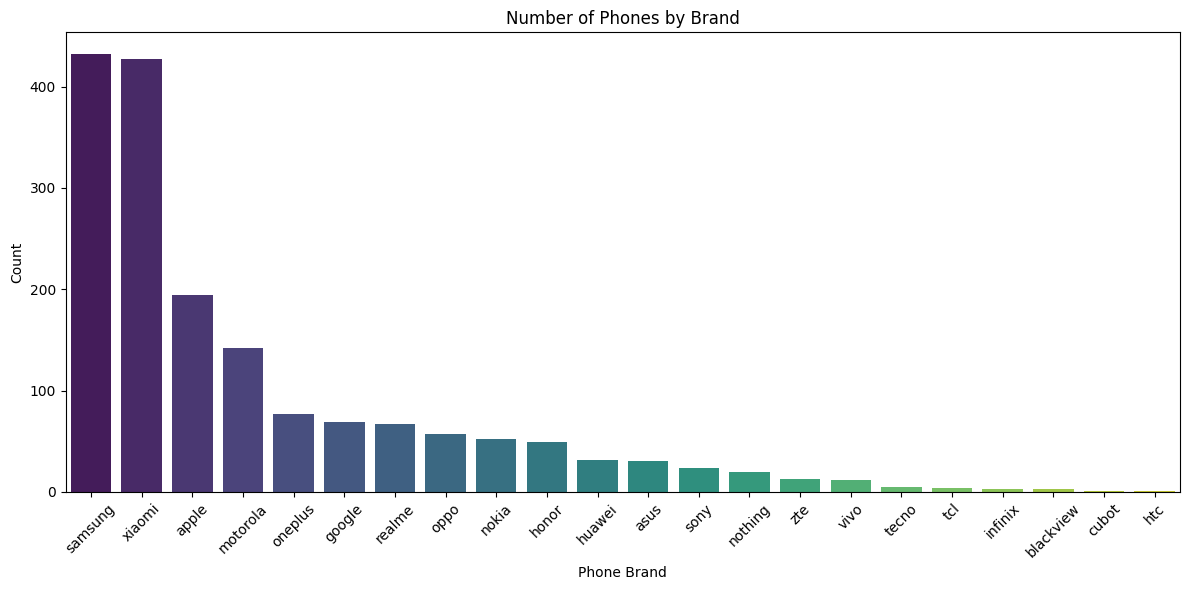

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='phone_brand', order=df['phone_brand'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title('Number of Phones by Brand')
plt.xlabel('Phone Brand')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

/var/folders/bd/5kj6lb3n53lc0cd833d7dkb00000gn/T/ipykernel_73717/849975983.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='phone_brand', y='price_USD', data=df,palette=palette)


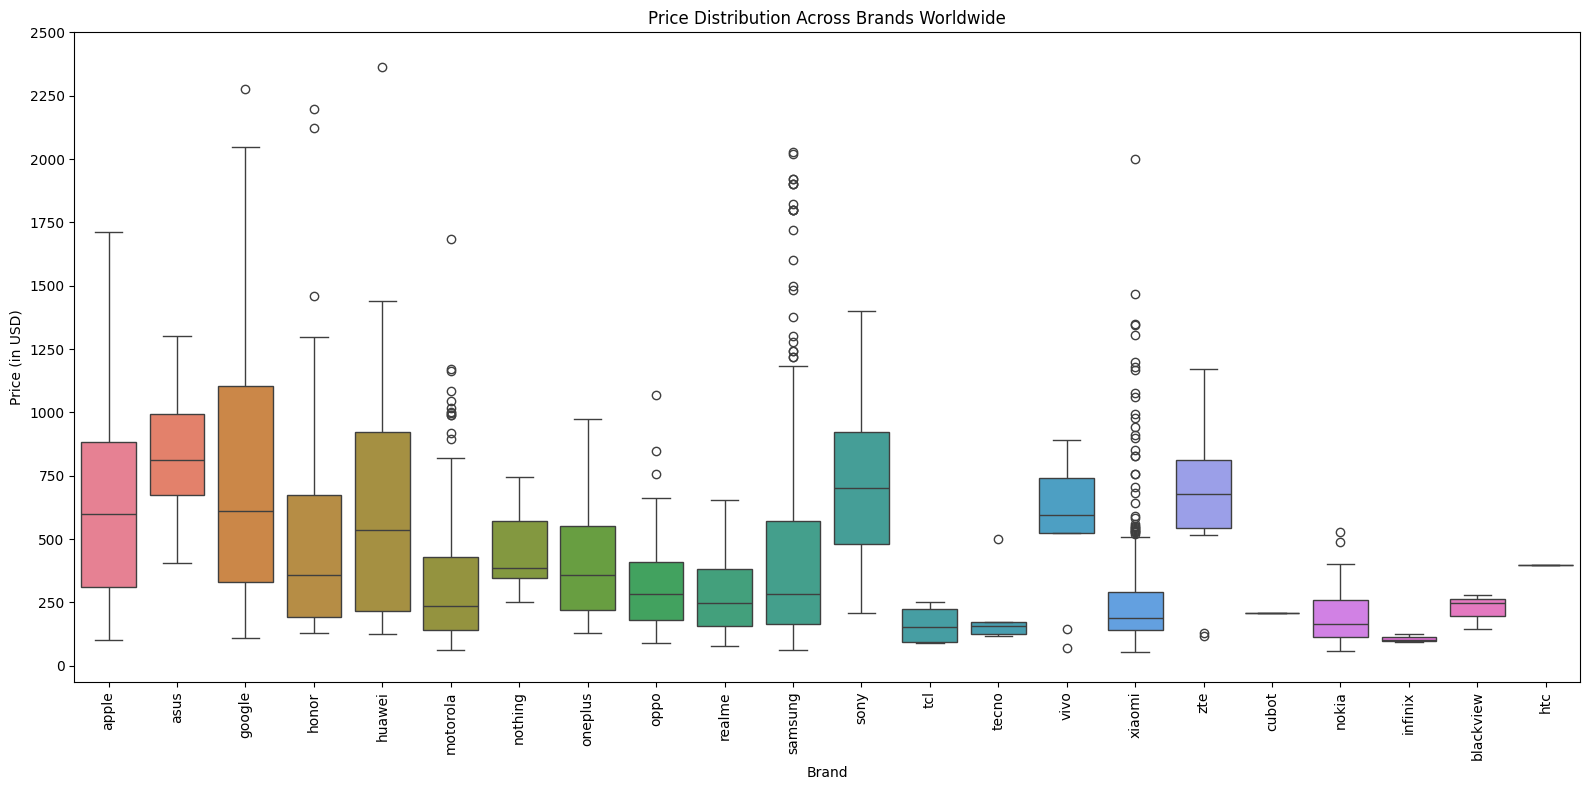

In [14]:
unique_brands = df['phone_brand'].unique()
palette = sns.color_palette("husl", len(unique_brands))
max_price = df['price_USD'].max()

plt.figure(figsize=(16, 8))
sns.boxplot(x='phone_brand', y='price_USD', data=df,palette=palette)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, max_price + 250, 250))
plt.title('Price Distribution Across Brands Worldwide')
plt.xlabel('Brand')
plt.ylabel('Price (in USD)')
plt.tight_layout()
plt.show()

In [15]:
def q1(x):
    return x.quantile(0.10)

def q2(x):
    return x.quantile(0.50)

def q3(x):
    return x.quantile(0.90)

price_quantiles = df.groupby('Year').agg(
        quantile_10=('price_USD', q1), 
        quantile_50=('price_USD', q2),
        quantile_90=('price_USD', q3)
                                    ).reset_index()

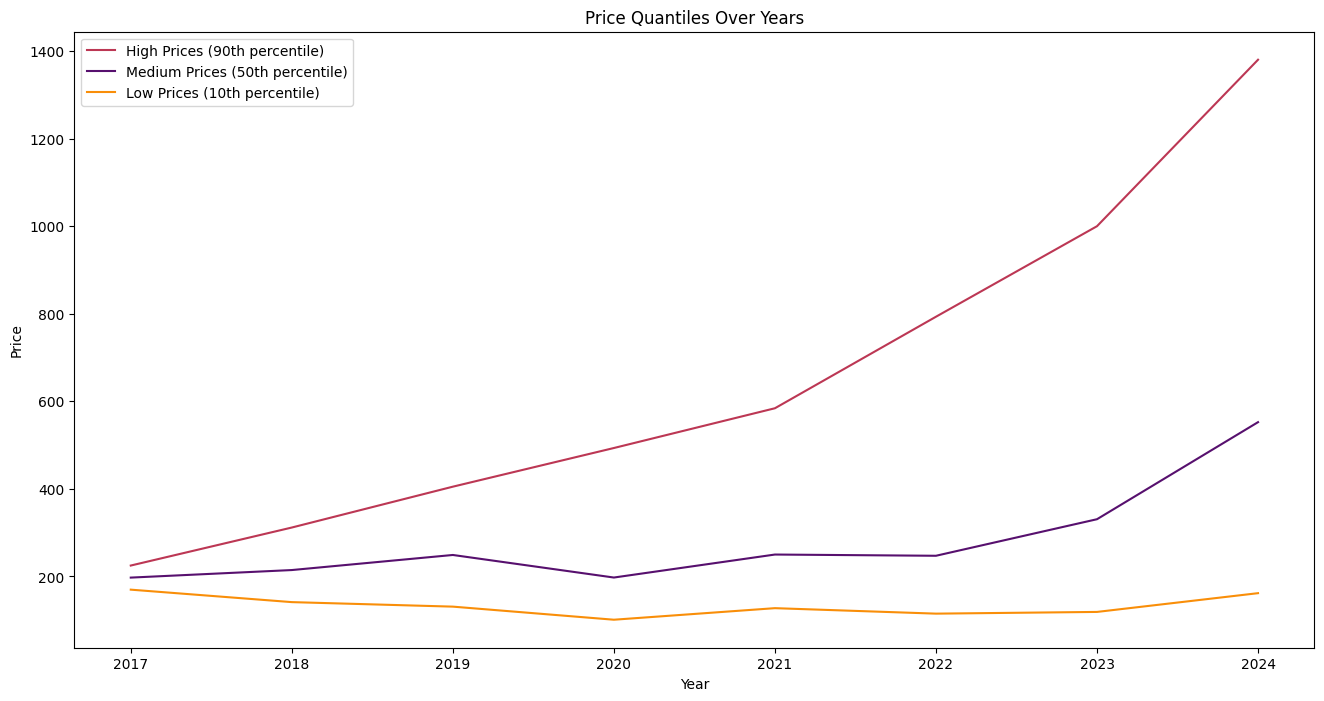

In [16]:
plt.figure(figsize=(16, 8))
pallet_Quantiles = sns.color_palette("inferno", 3)
plt.plot(price_quantiles['Year'], price_quantiles['quantile_90'], label='High Prices (90th percentile)', color=pallet_Quantiles[1])
plt.plot(price_quantiles['Year'], price_quantiles['quantile_50'], label='Medium Prices (50th percentile)', color=pallet_Quantiles[0])
plt.plot(price_quantiles['Year'], price_quantiles['quantile_10'], label='Low Prices (10th percentile)', color=pallet_Quantiles[2])
plt.title('Price Quantiles Over Years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

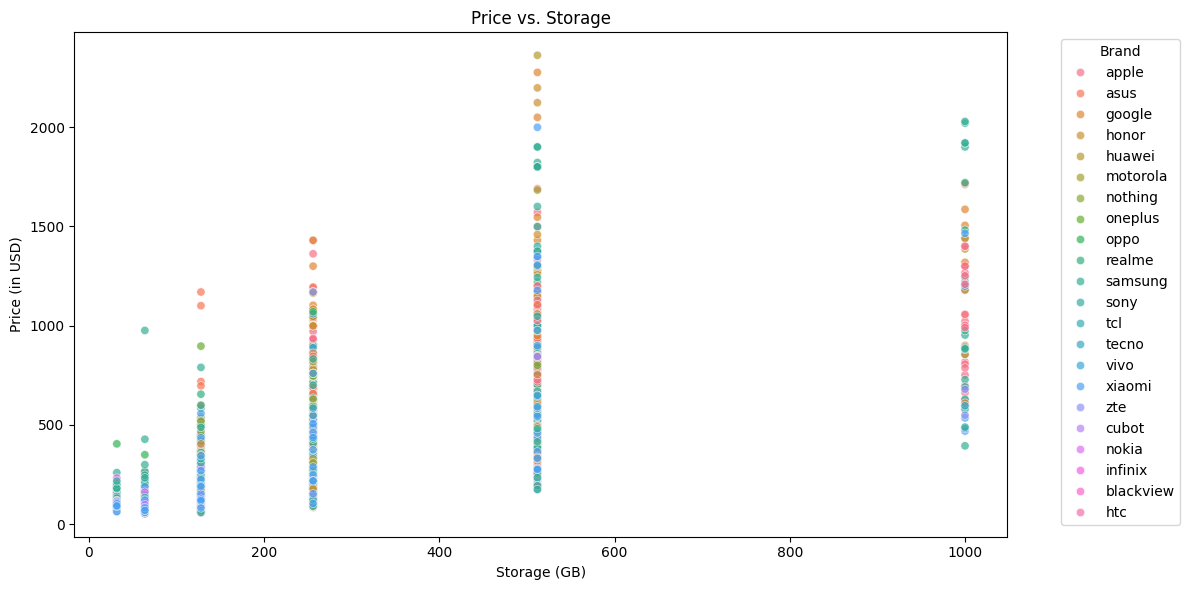

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='storage', y='price_USD', hue='phone_brand', palette='husl', alpha=0.7)
plt.title('Price vs. Storage')
plt.xlabel('Storage (GB)')
plt.ylabel('Price (in USD)')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

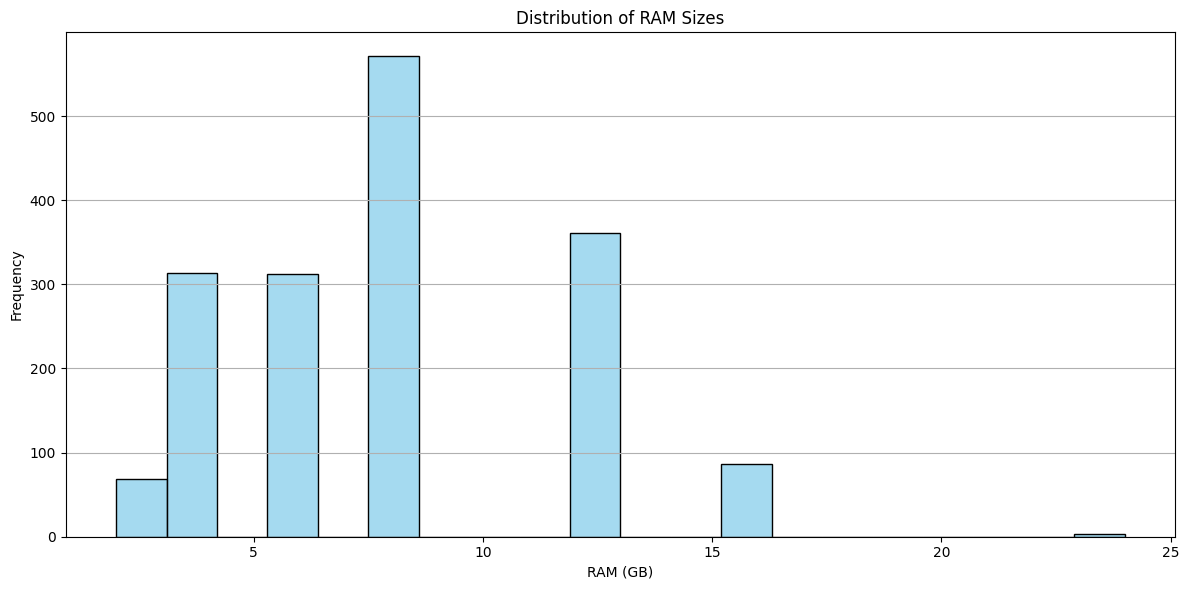

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(df['ram'], bins=20, color='skyblue')
plt.title('Distribution of RAM Sizes')
plt.xlabel('RAM (GB)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

/var/folders/bd/5kj6lb3n53lc0cd833d7dkb00000gn/T/ipykernel_73717/3805762897.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='price_range',palette='inferno', edgecolor = "#1c1c1c", linewidth = 2)


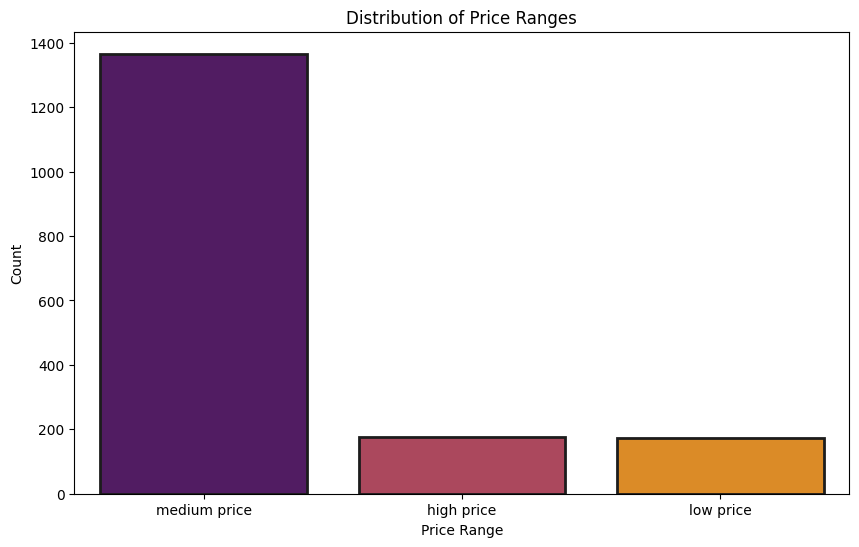

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='price_range',palette='inferno', edgecolor = "#1c1c1c", linewidth = 2)
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

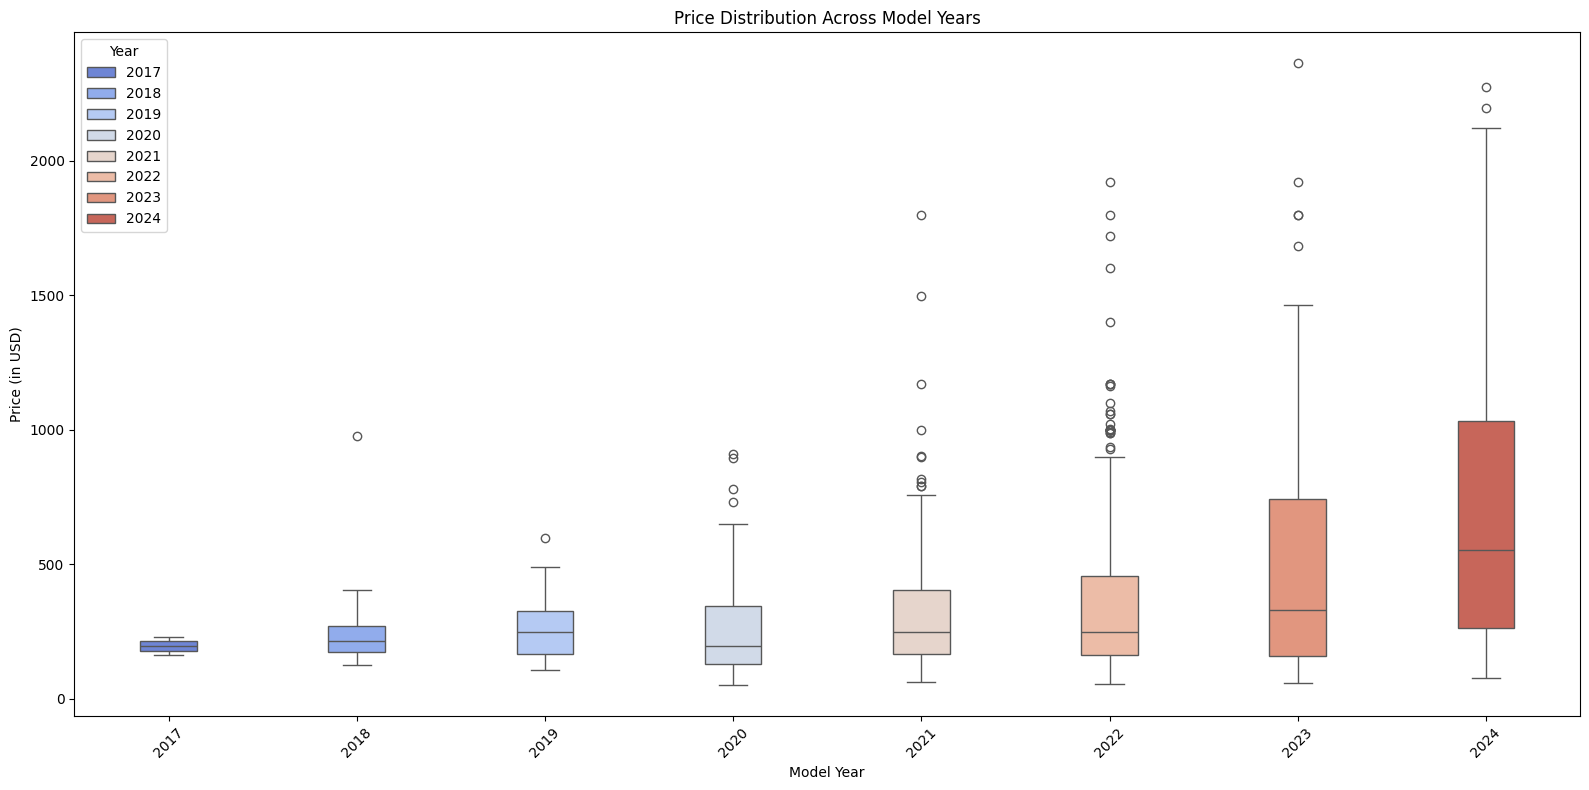

In [20]:
unique_years = df['Year'].dropna().unique()
palette = sns.color_palette("coolwarm",len(unique_years))
#Visualize Price distribution across Model Year
plt.figure(figsize=(16,8))
sns.boxplot(x='Year', y='price_USD', data=df,hue='Year',palette=palette, width= 0.3)
plt.xticks(rotation=45)
plt.title('Price Distribution Across Model Years')
plt.xlabel('Model Year')
plt.ylabel('Price (in USD)')
plt.tight_layout()
plt.show()

/var/folders/bd/5kj6lb3n53lc0cd833d7dkb00000gn/T/ipykernel_73717/2166581014.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_models, x='count', y='phone_model', palette='viridis', edgecolor='#1c1c1c', linewidth=2)


Text(0, 0.5, 'Phone Model')

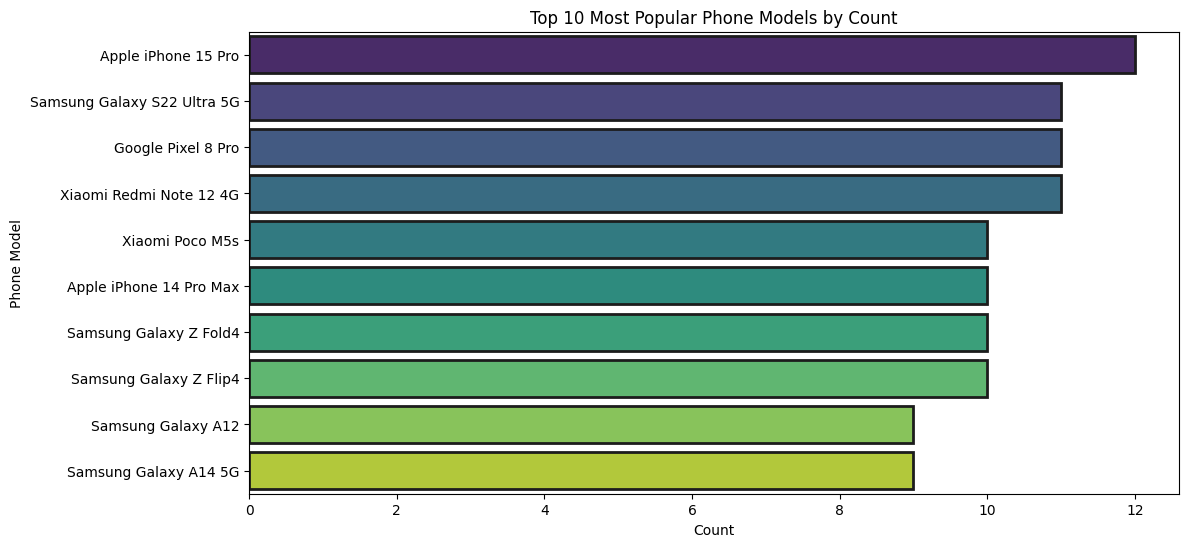

In [21]:
top_models = df.groupby('phone_model').agg(
    count=('phone_model', 'size'),
    average_price=('price_USD', 'mean')
).reset_index()


top_models_sorted = top_models.sort_values(by='count', ascending=False)


top_10_models = top_models_sorted.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_models, x='count', y='phone_model', palette='viridis', edgecolor='#1c1c1c', linewidth=2)

plt.title('Top 10 Most Popular Phone Models by Count')
plt.xlabel('Count')
plt.ylabel('Phone Model')

## Corellation

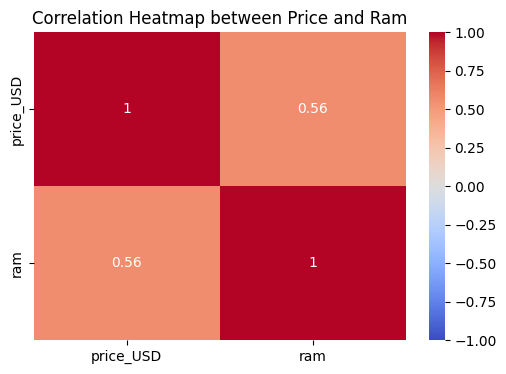

In [22]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['price_USD', 'ram']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Price and Ram')
plt.show()

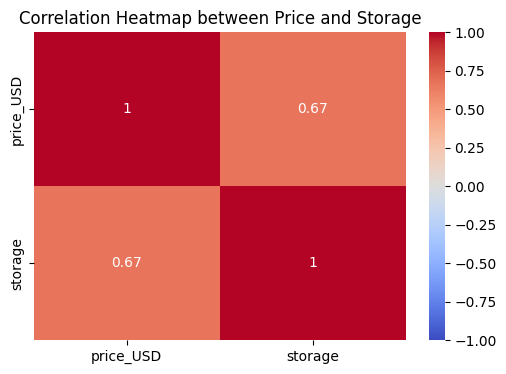

In [23]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['price_USD', 'storage']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Price and Storage')
plt.show()

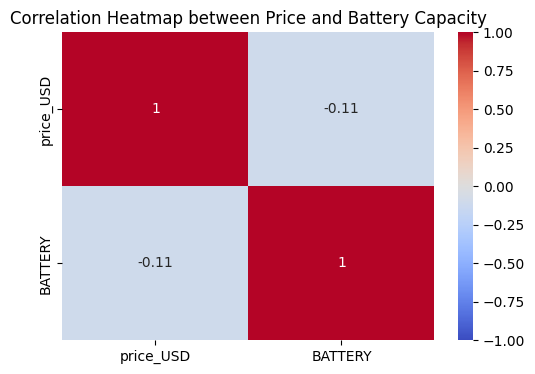

In [24]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['price_USD', 'BATTERY']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Price and Battery Capacity')
plt.show()

In [137]:
print(df[['price_USD', 'Display_Size']].corr())

              price_USD  Display_Size
price_USD      1.000000      0.269615
Display_Size   0.269615      1.000000


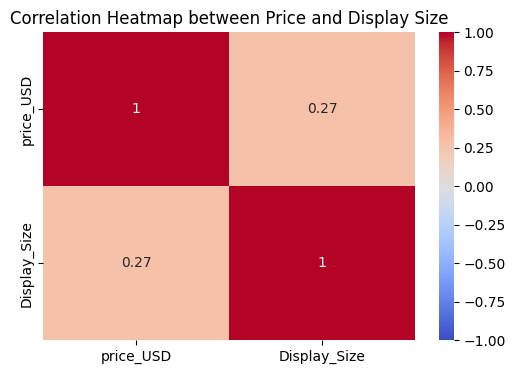

In [25]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['price_USD', 'Display_Size']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Price and Display Size')
plt.show()

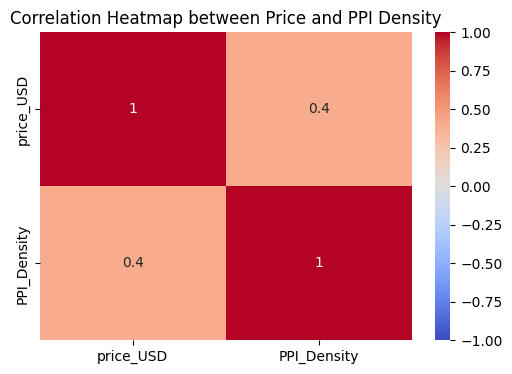

In [26]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['price_USD', 'PPI_Density']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Price and PPI Density')
plt.show()

In [27]:
def group_by_ram_storage(df):

    grouped_data = df.groupby(['ram', 'storage']).agg(
        count=('price_USD', 'size'),
        average_price=('price_USD', 'mean')
    ).reset_index()
    

    grouped_data['average_price'] = grouped_data['average_price'].round(2)
    

    return grouped_data.sort_values(by='count', ascending=False)


most_common_configs = group_by_ram_storage(df)


table = PrettyTable()
table.field_names = most_common_configs.columns.tolist()  


for idx, row in most_common_configs.head(10).iterrows():
    table.add_row(row)

print(table)

+------+---------+-------+---------------+
| ram  | storage | count | average_price |
+------+---------+-------+---------------+
| 8.0  |  256.0  | 326.0 |     395.01    |
| 6.0  |  128.0  | 185.0 |     203.92    |
| 8.0  |  128.0  | 175.0 |     251.5     |
| 4.0  |  128.0  | 175.0 |     162.38    |
| 12.0 |  256.0  | 169.0 |     442.12    |
| 12.0 |  512.0  | 152.0 |     784.85    |
| 6.0  |  256.0  |  61.0 |     484.22    |
| 8.0  |  512.0  |  59.0 |     799.99    |
| 4.0  |   64.0  |  55.0 |     141.36    |
| 16.0 |  512.0  |  45.0 |    1009.98    |
+------+---------+-------+---------------+


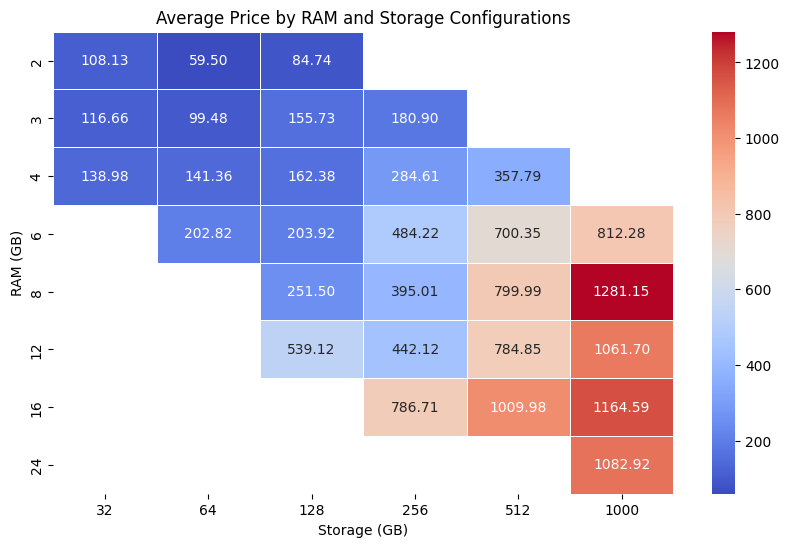

In [28]:
pivot_table = most_common_configs.pivot_table(index='ram', columns='storage', values='average_price')
# Create a heatmap based on the average prices
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Average Price by RAM and Storage Configurations')
plt.xlabel('Storage (GB)')
plt.ylabel('RAM (GB)')
plt.show()

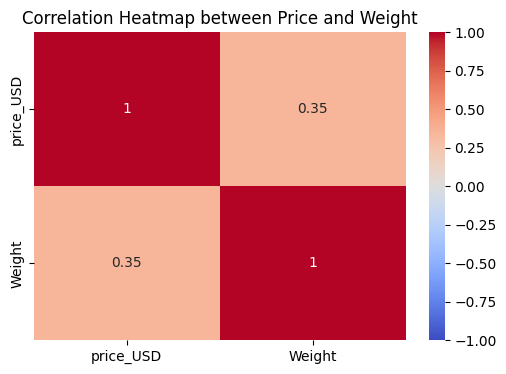

In [29]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['price_USD', 'Weight']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Price and Weight')
plt.show()

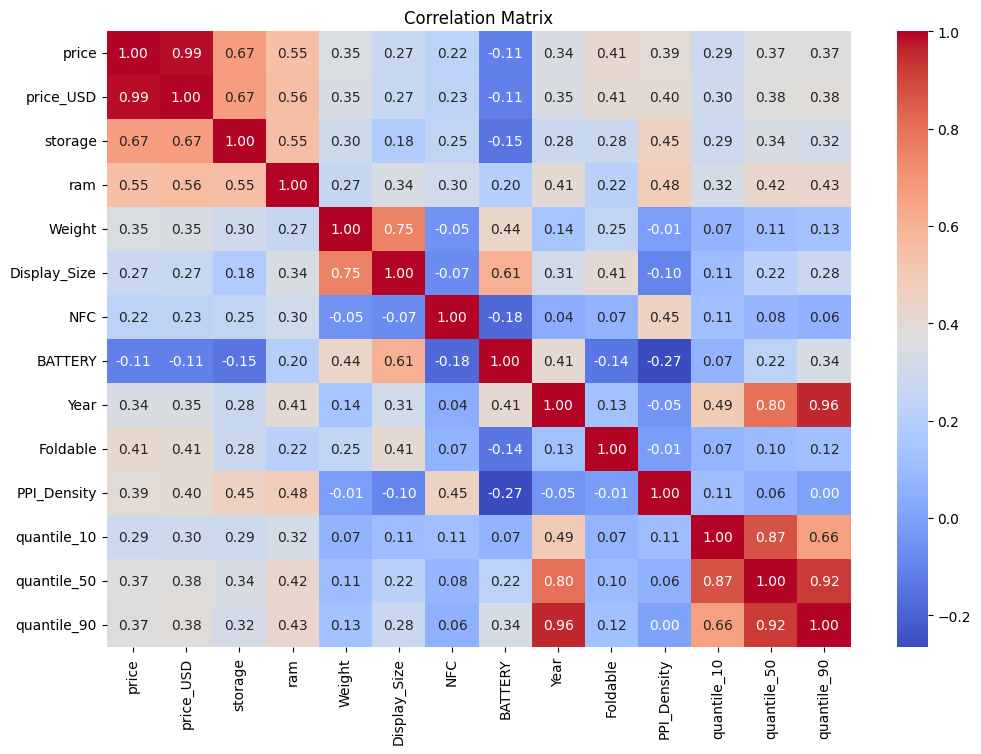

In [30]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [31]:
df.CPU.unique(
    
)

array(['Hexa-core (2x4.05 GHz + 4x2.42 GHz)',
       'Hexa-core (2x4.04 GHz + 4x2.20 GHz)',
       'Octa-core (1x3.3 GHz Cortex-X4 & 3x3.2 GHz Cortex-A720 & 2x3.0 GHz Cortex-A720 & 2x2.3 GHz Cortex-A520)',
       'Octa-core (1x3.1 GHz Cortex-X4 & 3x2.6 GHz Cortex-A720 & 4x1.92 GHz Cortex-A520)',
       'Nona-core (1x3.0 GHz Cortex-X3 & 4x2.45 GHz Cortex-A715 & 4x2.15 GHz Cortex-A510)',
       'Octa-core (1x2.63 GHz Cortex-A715 & 4x2.4 GHz Cortex-A715 & 3x1.8 GHz Cortex-A510)',
       'Octa-core (1x3.0 GHz Cortex-X4 & 4x2.8 GHz Cortex-A720 & 3x2.0 GHz Cortex-A520)',
       'Octa-core (4x2.4 GHz Cortex-A73 & 4x1.9 GHz Cortex-A53)',
       'Octa-core (1x2.3 GHz Taishan Big & 3x2.18 GHz Taishan Mid & 4x1.55 GHz  Cortex-A510)',
       'Octa-core (1x2.2 GHz Cortex-A76 & 3x Cortex-A76 & 4x Cortex-A55)',
       'Octa-core (2x2.5 GHz Cortex-A78 & 6x2.0 GHz Cortex-A55)',
       'Octa-core (4x2.5 GHz Cortex-A78 & 4x2.0 GHz Cortex-A55)',
       'Octa-core (2x2.3 GHz Cortex-A78 & 6x2.0 GHz Cortex-A

In [32]:
df.select_dtypes(object)

,phone_brand,phone_model,store,currency,Launch,Dimensions,Display_Type,Display_Resolution,OS,USB,Features_Sensors,Colors,Video,Chipset,CPU,GPU,price_range
0,apple,Apple iPhone 16 Pro,Amazon DE,EUR,2024-09-20,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",1206 x 2622,iOS 18,"USB Type-C 3.2 Gen 2, DisplayPort","Face ID, accelerometer, gyro, proximity, compa...","Black Titanium, White Titanium, Natural Titani...","4K@24/25/30/60/100/120fps, 1080p@25/30/60/120/...",Apple A18 Pro (3 nm),Hexa-core (2x4.05 GHz + 4x2.42 GHz),Apple GPU (6-core graphics),medium price
1,apple,Apple iPhone 16 Pro,Amazon DE,EUR,2024-09-20,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",1206 x 2622,iOS 18,"USB Type-C 3.2 Gen 2, DisplayPort","Face ID, accelerometer, gyro, proximity, compa...","Black Titanium, White Titanium, Natural Titani...","4K@24/25/30/60/100/120fps, 1080p@25/30/60/120/...",Apple A18 Pro (3 nm),Hexa-core (2x4.05 GHz + 4x2.42 GHz),Apple GPU (6-core graphics),high price
2,apple,Apple iPhone 16 Pro,Amazon DE,EUR,2024-09-20,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",1206 x 2622,iOS 18,"USB Type-C 3.2 Gen 2, DisplayPort","Face ID, accelerometer, gyro, proximity, compa...","Black Titanium, White Titanium, Natural Titani...","4K@24/25/30/60/100/120fps, 1080p@25/30/60/120/...",Apple A18 Pro (3 nm),Hexa-core (2x4.05 GHz + 4x2.42 GHz),Apple GPU (6-core graphics),high price
3,apple,Apple iPhone 16 Pro Max,Amazon DE,EUR,2024-09-20,163 x 77.6 x 8.3 mm (6.42 x 3.06 x 0.33 in),"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",1320 x 2868,iOS 18,"USB Type-C 3.2 Gen 2, DisplayPort","Face ID, accelerometer, gyro, proximity, compa...","Black Titanium, White Titanium, Natural Titani...","4K@24/25/30/60/100/120fps, 1080p@25/30/60/120/...",Apple A18 Pro (3 nm),Hexa-core (2x4.05 GHz + 4x2.42 GHz),Apple GPU (6-core graphics),high price
4,apple,Apple iPhone 16,Amazon DE,EUR,2024-09-20,147.6 x 71.6 x 7.8 mm (5.81 x 2.82 x 0.31 in),"Super Retina XDR OLED, HDR10, Dolby Vision, 10...",1179 x 2556,iOS 18,"USB Type-C 2.0, DisplayPort","Face ID, accelerometer, gyro, proximity, compa...","Black, White, Pink, Teal, Ultramarine","4K@24/25/30/60fps, 1080p@25/30/60/120/240fps, ...",Apple A18 (3 nm),Hexa-core (2x4.04 GHz + 4x2.20 GHz),Apple GPU (5-core graphics),medium price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,xiaomi,Xiaomi Redmi Note 13 Pro,AliExpress,USD,2023-09-21,161.2 x 74.2 x 8 mm (6.35 x 2.92 x 0.31 in),"AMOLED, 68B colors, 120Hz, Dolby Vision, 500 n...",1220 x 2712,"Android 13, up to 3 major Android upgrades, Hy...","USB Type-C 2.0, OTG","Fingerprint (under display, optical), accelero...","Midnight Black, Aurora Purple (Coral Purple), ...","4K@30fps, 1080p@30/60/120fps, gyro-EIS",Qualcomm SM7435-AB Snapdragon 7s Gen 2 (4 nm),Octa-core (4x2.40 GHz Cortex-A78 & 4x1.95 GHz ...,Adreno 710,medium price
1711,xiaomi,Xiaomi Redmi Note 13 Pro,AliExpress,USD,2023-09-21,161.2 x 74.2 x 8 mm (6.35 x 2.92 x 0.31 in),"AMOLED, 68B colors, 120Hz, Dolby Vision, 500 n...",1220 x 2712,"Android 13, up to 3 major Android upgrades, Hy...","USB Type-C 2.0, OTG","Fingerprint (under display, optical), accelero...","Midnight Black, Aurora Purple (Coral Purple), ...","4K@30fps, 1080p@30/60/120fps, gyro-EIS",Qualcomm SM7435-AB Snapdragon 7s Gen 2 (4 nm),Octa-core (4x2.40 GHz Cortex-A78 & 4x1.95 GHz ...,Adreno 710,medium price
1712,xiaomi,Xiaomi Redmi Note 13 Pro+,AliExpress,USD,2023-09-21,161.4 x 74.2 x 8.9 mm (6.35 x 2.92 x 0.35 in),"AMOLED, 68B colors, 120Hz, Dolby Vision, HDR10...",1220 x 2712,"Android 13, up to 3 major Android upgrades, Hy...","USB Type-C 2.0, OTG","Fingerprint (under display, optical), accelero...","Midnight Black (Fushion Black), Moonlight Whit...","4K@24/30fps, 1080p@30/60/120fps, gyro-EIS",Mediatek Dimensity 7200 Ultra (4 nm),Octa-core (2x2.8 GHz Cortex-A715 & 6x2.0 GHz C...,

In [33]:
target = df.price_range.copy(deep=True)
features = df.drop(columns=[
    'price','price_USD', 'price_range',
    'quantile_10','quantile_50', 'quantile_90',
    'phone_model', 'currency', 'Colors', 
    'OS',  # b/c we already know it from brand
    'USB', #b/c half of them are just USB and other majortiy type c
    'GPU', # b/c chipset defines GPU
    'Display_Type',
    'Features_Sensors'
]).copy(deep=True)
features.head(3)

,phone_brand,store,storage,ram,Launch,Dimensions,Weight,Display_Size,Display_Resolution,NFC,BATTERY,Video,Chipset,CPU,Year,Foldable,PPI_Density
0,apple,Amazon DE,256,8,2024-09-20,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),199.0,6.3,1206 x 2622,1,3582,"4K@24/25/30/60/100/120fps, 1080p@25/30/60/120/...",Apple A18 Pro (3 nm),Hexa-core (2x4.05 GHz + 4x2.42 GHz),2024,0,460
1,apple,Amazon DE,512,8,2024-09-20,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),199.0,6.3,1206 x 2622,1,3582,"4K@24/25/30/60/100/120fps, 1080p@25/30/60/120/...",Apple A18 Pro (3 nm),Hexa-core (2x4.05 GHz + 4x2.42 GHz),2024,0,460
2,apple,Amazon DE,1000,8,2024-09-20,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),199.0,6.3,1206 x 2622,1,3582,"4K@24/25/30/60/100/120fps, 1080p@25/30/60/120/...",Apple A18 Pro (3 nm),Hexa-core (2x4.05 GHz + 4x2.42 GHz),2024,0,460


In [34]:
## helper functions
import re

def extract_dimensions(dim_string):
    metric_match = re.search(r'(\d+(\.\d+)?) x (\d+(\.\d+)?) x (\d+(\.\d+)?) mm', dim_string)
    if metric_match:
        width_mm = float(metric_match.group(1))
        length_mm = float(metric_match.group(3))
        height_mm = float(metric_match.group(5))
        return width_mm, length_mm, height_mm
    return (None, None, None)

def extract_resolution(res_string):
    match = re.search(r'(\d+)\s*x\s*(\d+)', res_string)
    width = int(match.group(1))
    height = int(match.group(2))
    return width, height

def extract_core_info(core_string):
    match = re.search(r'(\w+)-core\s*\((.*?)\)', core_string)
    
    if match:
        ghz_values = re.findall(r'(\d+\.\d+)\s*GHz', match.group(2))
        first_ghz = float(ghz_values[0]) if ghz_values else None
    else:
        first_ghz = None
    if 'octa' in core_string.lower():
        return 8, first_ghz
    if 'hex' in core_string.lower():
        return 6, first_ghz
    if 'quad' in core_string.lower():
        return 4, first_ghz
    if 'dual' in core_string.lower():
        return 2, first_ghz
    return None, first_ghz


features['width'] = features.Dimensions.apply(lambda x: extract_dimensions(x)[0])
features['lenght'] = features.Dimensions.apply(lambda x: extract_dimensions(x)[1])
features['height'] = features.Dimensions.apply(lambda x: extract_dimensions(x)[2])
features = features.drop(columns='Dimensions')

features['disp_width'] = features.Display_Resolution.apply(lambda x: extract_resolution(x)[0])
features['disp_lenght'] = features.Display_Resolution.apply(lambda x: extract_resolution(x)[1])
features = features.drop(columns='Display_Resolution')

features['Video'] = features['Video'].apply(
    lambda x: '8k' if '8k' in x.lower() else '4k' if '4k' in x.lower() else 'fullHD')

features['CPU_cores'] = features.CPU.apply(lambda x: extract_core_info(x)[0])
features['CPU_hz'] = features.CPU.apply(lambda x: extract_core_info(x)[1])
features = features.drop(columns='CPU')

features.Launch = pd.to_datetime(features.Launch)

X, y = features, target

## Feature Selection

In [35]:
X.select_dtypes('number')[X.select_dtypes('number').isna().any(axis=1)]

,storage,ram,Weight,Display_Size,NFC,BATTERY,Year,Foldable,PPI_Density,width,lenght,height,disp_width,disp_lenght,CPU_cores,CPU_hz
18,256,8,188.0,6.1,1,4492,2024,0,430,152.1,72.7,8.9,1080,2400,NaN,3.00
54,512,12,232.0,6.8,1,5000,2024,0,505,162.3,79.0,8.6,1440,3120,NaN,3.39
55,1000,12,232.0,6.8,1,5000,2024,0,505,162.3,79.0,8.6,1440,3120,NaN,3.39
56,512,12,196.0,6.7,1,4900,2024,0,513,158.5,75.9,7.7,1440,3120,NaN,3.39
62,256,8,167.0,6.2,1,4000,2024,0,416,147.0,70.6,7.6,1080,2340,NaN,3.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,512,12,213.0,6.7,1,5050,2023,0,489,162.6,76.5,8.8,1344,2992,NaN,3.00
1457,1000,12,213.0,6.7,1,5050,2023,0,489,162.6,76.5,8.8,1344,2992,NaN,3.00
1592,256,8,187.0,6.2,1,4575,2023,0,428,150.5,70.8,8.9,1080,2400,NaN,3.00
1593,256,12,213.0,6.7,1,5050,2023,0,489,162.6,76.5,8.8,1344,2992,NaN,3.00


In [36]:
from sklearn.feature_selection import SelectKBest, chi2

df_select_kbest = pd.concat([
    X.select_dtypes('number'), y
    ], axis=1).dropna()

X_kbest, y_kbest = df_select_kbest.drop(columns='price_range'), df_select_kbest['price_range']
feature_selector_kbest = SelectKBest(chi2, k=5)
feature_selector_kbest.fit(X_kbest, y_kbest)
print("Top 5 features selected by Select K best method by chi-square score:")
for feach in feature_selector_kbest.get_feature_names_out():
    print(f"\t{feach}")

Top 5 features selected by Select K best method by chi-square score:
	storage
	BATTERY
	PPI_Density
	disp_width
	disp_lenght


# Exercise 2: Feature Importance with Random Forest

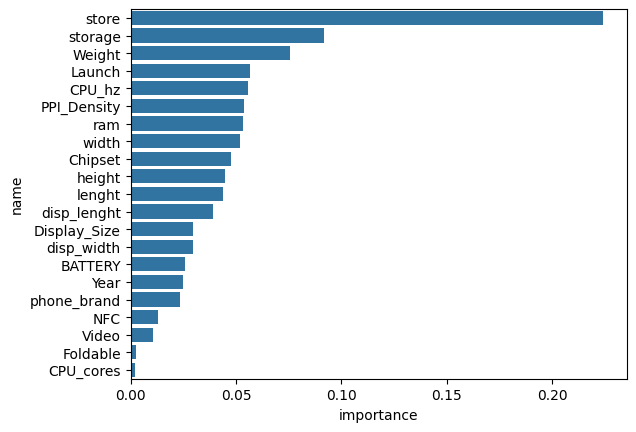

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
df_select_rf = pd.concat([X, y], axis=1).dropna()

X_rf, y_rf = df_select_rf.drop(columns='price_range'), df_select_rf.price_range

for col in X_rf.select_dtypes(exclude=['number', 'datetime']).columns:
    le = LabelEncoder()
    X_rf[col] = le.fit_transform(X_rf[col].fillna('idk'))

for col in X_rf.select_dtypes('datetime').columns:
    X_rf[col] = X_rf[col].astype(int)

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_rf, y_rf )

feature_imp_rf = pd.DataFrame( {
        "importance": random_forest_model.feature_importances_,
        "name": random_forest_model.feature_names_in_,
}).sort_values(by="importance", ascending=False)

sns.barplot(feature_imp_rf, x="importance", y="name")
plt.show()

## RFE with random forest

12


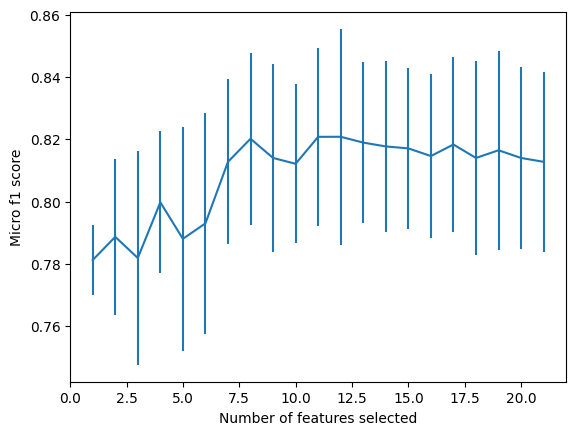

In [38]:
from sklearn.feature_selection import RFECV
feature_selector_rfe = RFECV(
    RandomForestClassifier(random_state=15), step=1, n_jobs=-1, scoring='f1_micro',
)
feature_selector_rfe.fit(X_rf, y_rf)
selected_features = feature_selector_rfe.get_feature_names_out()

print(feature_selector_rfe.n_features_)
cv_results = pd.DataFrame(feature_selector_rfe.cv_results_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Micro f1 score")
plt.errorbar(
    x=cv_results["n_features"],
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.show()

#### dimensionality reduction for vizualization only

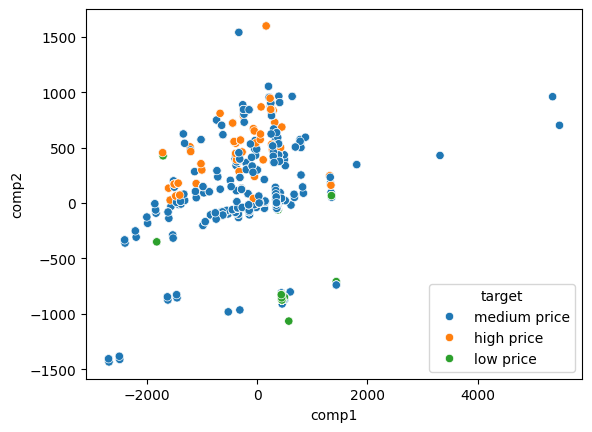

In [44]:
from sklearn.decomposition import PCA
df_pca = pd.concat([
    X.select_dtypes('number'), y
], axis=1).dropna()

pca = PCA(2)
components = pca.fit_transform(df_pca.drop(columns=['price_range']))
pca_res = pd.DataFrame({
    'comp1':components[:,0],
    'comp2':components[:,1],
    'target': df_pca.price_range
})
sns.scatterplot(
    pca_res, x='comp1', y='comp2', hue='target'
)
plt.show()

### basic classification

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_dt = X.copy()[selected_features]

for col in X_dt.select_dtypes(exclude=['number', 'datetime']).columns:
    le = LabelEncoder()
    X_dt[col] = le.fit_transform(X_dt[col].fillna('idk'))

for col in X_dt.select_dtypes('datetime').columns:
    X_dt[col] = X_dt[col].astype(int)

X_tr, X_val, y_tr, y_val = train_test_split(X_dt, y)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_tr, y_tr)

DecisionTreeClassifier()

In [49]:
from sklearn.metrics import classification_report
print("On Train Data")
print(classification_report(y_tr, dt_clf.predict(X_tr)))
print("On Test Data")
print(classification_report(y_val, dt_clf.predict(X_val)))

On Train Data
              precision    recall  f1-score   support

  high price       1.00      1.00      1.00       133
   low price       1.00      1.00      1.00       134
medium price       1.00      1.00      1.00      1019

    accuracy                           1.00      1286
   macro avg       1.00      1.00      1.00      1286
weighted avg       1.00      1.00      1.00      1286

On Test Data
              precision    recall  f1-score   support

  high price       0.68      0.74      0.71        43
   low price       0.53      0.54      0.53        39
medium price       0.92      0.90      0.91       347

    accuracy                           0.85       429
   macro avg       0.71      0.73      0.72       429
weighted avg       0.86      0.85      0.85       429



## Advanced Classification Methods

In [135]:
from sklearn.ensemble import HistGradientBoostingClassifier

X_gbm = X[selected_features].copy(deep=True)

for col in X_gbm.select_dtypes('datetime').columns:
    X_gbm[col] = X_gbm[col].astype(int)

X_tr, X_val, y_tr, y_val = train_test_split(X_gbm, y)
gbm_clf = HistGradientBoostingClassifier(
    class_weight='balanced',
    max_depth=8,
    categorical_features=X_gbm.select_dtypes('object').columns,
    validation_fraction=0.15
)
gbm_clf.fit(X_tr, y_tr)

HistGradientBoostingClassifier(categorical_features=Index(['store', 'Chipset'], dtype='object'),
                               class_weight='balanced', max_depth=8,
                               validation_fraction=0.15)

In [136]:
print("On Train Data")
print(classification_report(y_tr, gbm_clf.predict(X_tr)))
print("On Test Data")
print(classification_report(y_val, gbm_clf.predict(X_val)))

On Train Data
              precision    recall  f1-score   support

  high price       1.00      1.00      1.00       126
   low price       0.98      1.00      0.99       130
medium price       1.00      1.00      1.00      1030

    accuracy                           1.00      1286
   macro avg       0.99      1.00      1.00      1286
weighted avg       1.00      1.00      1.00      1286

On Test Data
              precision    recall  f1-score   support

  high price       0.69      0.66      0.67        50
   low price       0.65      0.70      0.67        43
medium price       0.91      0.91      0.91       336

    accuracy                           0.86       429
   macro avg       0.75      0.76      0.75       429
weighted avg       0.86      0.86      0.86       429

